# Data Visualization & Tidying Lab

This notebook is split into **two parts**:

1. **Core skills tutorial** – short walkthroughs that demonstrate standard Python data-visualization techniques with `matplotlib`, `seaborn`, and `pandas`.  
2. **Applied challenges** – five messy, simulated data sets accompanied by stakeholder-style questions that someone might ask you to answer. Your task is to tidy each data set and write a brief data story for your audience with visuals.



## Part 1 – Core Visualization Skills 

### 1. Line, scatter, bar – the classics

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd

# Load example
fmri = sns.load_dataset('fmri')

# LINE PLOT — average signal over time for each event type
plt.figure(figsize=(7,4))
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='event') 
plt.title('Line plot: fMRI signal over time')
plt.show()



In [ ]:
# SCATTER PLOT — flipper vs body mass
penguins = sns.load_dataset('penguins').dropna()
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Scatter plot: flipper length vs body mass')
plt.show()



In [ ]:
# BAR PLOT — mean total bill by day
tips = sns.load_dataset('tips')
sns.barplot(data=tips, x='day', y='total_bill', errorbar='sd')
plt.title('Bar plot: mean total bill by day')
plt.show()

These three basic plotting examples cover **quantitative over time**, **relationship between two numeric variables**, and **comparisons across categories**. Remember to always label axes and provide context in titles or captions.

### 2. Distributions – histograms, KDEs, box/violin

Use **histograms/KDEs** for a single distribution and **box/violin** plots for comparing distributions across groups.

In [ ]:
# Histogram + KDE overlay for 'total_bill'
plt.figure(figsize=(6,4))
sns.histplot(tips['total_bill'], kde=True, bins=20)
plt.title('Histogram + KDE: total bill')
plt.show()


#### What is a KDE and why would you ever want one? 

A KDE (kernel density estimate) is a way to visualize the distribution of the data.

In [ ]:
# Box & violin plots side-by-side
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=tips, x='day', y='tip', ax=ax[0])
ax[0].set_title('Boxplot: tip by day')
sns.violinplot(data=tips, x='day', y='tip', ax=ax[1])
ax[1].set_title('Violin plot: tip by day')
plt.tight_layout()
plt.show()

#### Why would you want to use a boxplot over a violin plot and vice versa?

A violin plot shows the distribution of the data, which may be helpful for seeing patterns in the data. A box plot is more helpful for seeing the presence of outliers (shown as dots beyond the "whiskers").

### 3. Multi-dimensional encodings – color, size & facets

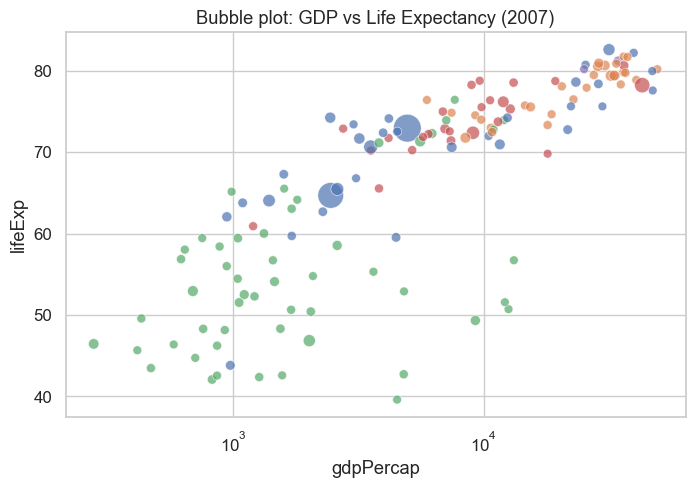

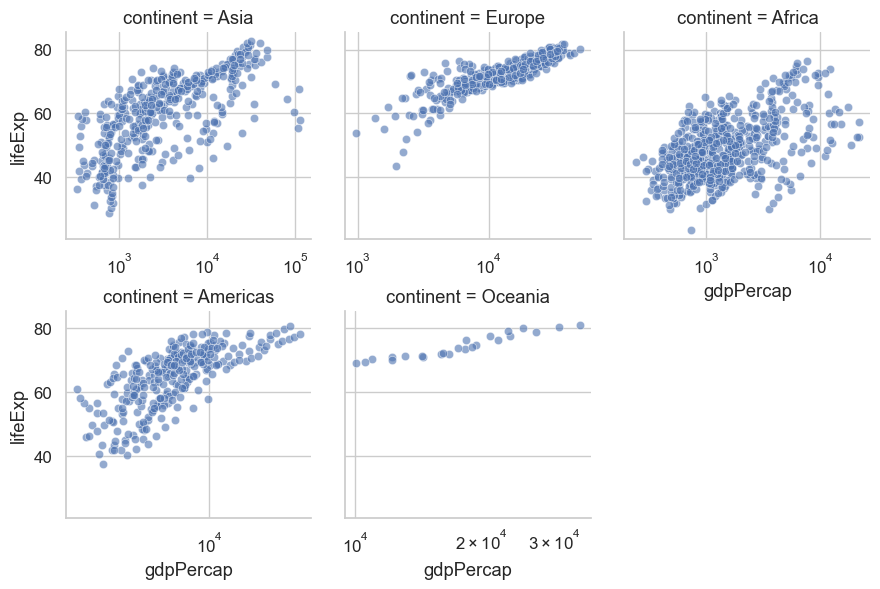

In [83]:
# Bubble plot: GDP vs life expectancy, bubble size = population
gap_url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
gap = pd.read_csv(gap_url)
year2007 = gap[gap.year == 2007]

plt.figure(figsize=(8,5))
sns.scatterplot(data=year2007, x='gdpPercap', y='lifeExp',
                size='pop', hue='continent', sizes=(40,400), alpha=0.7, legend=False)
plt.xscale('log')
plt.title('Bubble plot: GDP vs Life Expectancy (2007)')
plt.show()

# Facet grid
g = sns.relplot(data=gap, x='gdpPercap', y='lifeExp',
                col='continent', col_wrap=3,
                kind='scatter', height=3, alpha=0.6, facet_kws={'sharex':False})
g.set(xscale='log')

color, point size, and faceting let you incorporate **additional variables** without clutter.

### 4. Time series & multiple lines

In [ ]:
# Flights example
flights = sns.load_dataset('flights')
pivot = flights.pivot(index='month', columns='year', values='passengers')

pivot.plot(figsize=(10,5))
plt.title('Monthly air passengers (1949-1960)')
plt.ylabel('Passengers')
plt.legend(loc='upper left', ncol=4, title='Year')
plt.show()

Pivoting long-format data wide can make multi-line time-series plots straightforward.

### 5. Customising aesthetics

In [ ]:
# Global Seaborn style
sns.set_theme(style='whitegrid', context='notebook', font_scale=1.1)

plt.figure(figsize=(6,4))
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', palette='Set2')
plt.title('Total bill by day & biological sex')
plt.xlabel('Day of week')
plt.ylabel('Total bill ($)')
sns.despine()
plt.show()

Small touches (despine, style, context, custom palettes) go a long way to professional-looking figures.

## Part 2 – Applied Challenges

Below are five *realistic* messy data sets.  
For **each**:

1. **Run** the *Generate the data* cell to create a DataFrame `df`.  
2. Inspect & **tidy** it into a clean, analysis-ready form (remember *Tidy ≡ one variable per column, one observation per row*).  
3. **Answer the questions** in a concise written report (use the provided headings).  
4. Support your conclusions with **at least two visualizations** (feel free to create more).

### Report template (copy for each dataset)
- **Context** – restate the stakeholder’s objective in 1-2 sentences.  
- **Tidying steps** – bullet list of wrangling operations applied.  
- **Findings** – describe what the visuals show.  
- **Recommendations** – actionable insights for the stakeholder.


### Challenge 1: Global Gadget Co. sales data (messy wide)

*Stakeholder*: **VP of Sales**  
> “We need to understand how each product sold across regions over the year and spot any patterns.”

**Key questions**
1. Which region and month generated the highest revenue for *Gizmo*?
2. Do *Widget* and *Doohickey* follow similar patterns over the year?

### Challenge 2: IoT greenhouse sensor logs

*Stakeholder*: **Facility engineer**  
> “Our sensors embed temperature and humidity in one field. I suspect humidity spikes at night – can you confirm?”

**Key questions**
1. At what hours does humidity exceed 60 % most frequently?
2. Is there any correlation between temperature and humidity?

### Challenge 3: Developer tools preference survey

*Stakeholder*: **Product manager**  
> “We surveyed devs about their favorite tools. Can you tell if age group influences tool choice and satisfaction?”

**Key questions**
1. Which tools are most popular in the 18-24 vs 45+ brackets?
2. Does reported satisfaction differ by primary tool?

### Challenge 4: Blood pressure drug trial

*Stakeholder*: **Principal Investigator**  
> “We ran a cross-over trial with three conditions. Summarise efficacy in reducing BP and highlight best performer.”

**Key questions**
1. What is the average BP reduction (post-minus-pre) for each drug?
2. Is there any individual variability?

### Challenge 5: Social media campaign analytics

*Stakeholder*: **Marketing lead**  
> “Our views are recorded as strings like ‘1.2k’. Clean this up and evaluate platform performance.”

**Key questions**
1. Which platform achieved the highest median daily *views* and *like rate*?
2. Are weekends different from weekdays?

### Challenge 1: Global Gadget Co. sales data (messy wide)

*Stakeholder*: **VP of Sales**  
> “We need to understand how each product sold across regions over the year and spot any seasonality.”

**Key questions**
1. Which region and month generated the highest revenue for *Gizmo*?
2. Do *Widget* and *Doohickey* follow similar seasonal patterns?

In [51]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    np.random.seed(0)
    months = list(range(1,13))
    regions = ['North', 'South', 'East', 'West']
    data = {}
    for r in regions:
        for m in months:
            col = f"{r[:2]}_{m}"
            data[col] = np.random.poisson(lam=2000 + 100*m + 400*regions.index(r), size=3)
    df = pd.DataFrame(data)
    df['Product'] = ['Gizmo', 'Widget', 'Doohickey']
    df = df.sample(frac=1, axis=1).reset_index(drop=True)
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (3, 49)


,Ea_4,Ea_6,So_9,We_7,No_6,We_5,No_12,We_6,We_1,So_5,...,No_1,No_9,Ea_5,We_2,So_10,No_8,So_8,No_10,Ea_7,We_8
0,3183,3431,3289,3998,2708,3673,3170,3864,3389,2954,...,2106,2895,3181,3354,3331,2810,3212,2947,3469,3919
1,3241,3406,3356,3870,2579,3699,3089,3802,3308,2974,...,2113,2839,3268,3429,3335,2752,3225,3057,3515,4043
2,3152,3428,3213,3883,2630,3677,3211,3705,3454,2974,...,2090,2924,3280,3362,3322,2823,3284,3061,3522,4053


#### Your analysis below

In [52]:
df_tidy = df.melt(id_vars='Product', var_name='Region_Month', value_name='Sales')
df_tidy['Region'] = df_tidy['Region_Month'].str.extract(r"([A-Z][a-z])_\d+")
df_tidy['Month'] = df_tidy['Region_Month'].str.extract(r"[A-Z][a-z]_(\d+)").astype(int)
df_tidy = df_tidy.drop('Region_Month', axis=1)
df_tidy.head()

,Product,Sales,Region,Month
0,Gizmo,3183,Ea,4
1,Widget,3241,Ea,4
2,Doohickey,3152,Ea,4
3,Gizmo,3431,Ea,6
4,Widget,3406,Ea,6


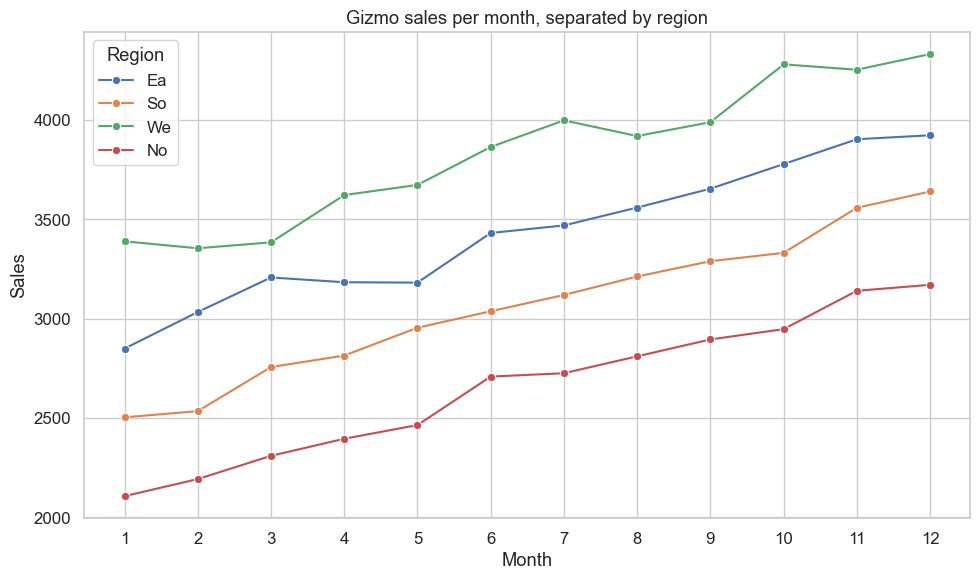

In [53]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tidy[df_tidy['Product'] == 'Gizmo'], x='Month', y='Sales', hue='Region', marker='o')
plt.title('Gizmo sales per month, separated by region')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

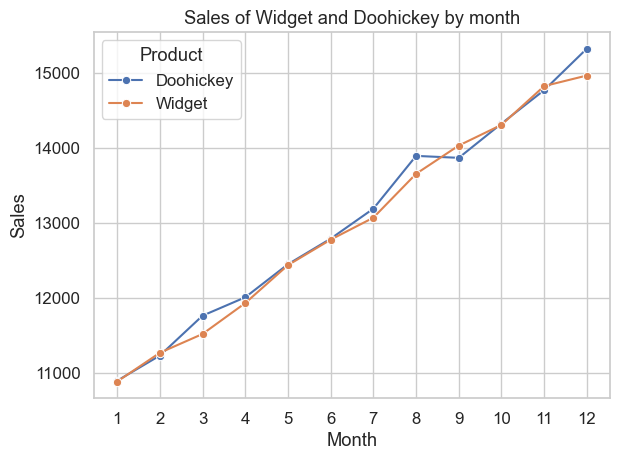

In [54]:
df_widget_doohickey = df_tidy[df_tidy['Product'].isin(['Widget', 'Doohickey'])].copy()
sns.lineplot(data=df_widget_doohickey.groupby(['Product', 'Month'], as_index=False)['Sales'].sum(),
             x='Month', y='Sales', hue='Product', marker='o')
plt.title('Sales of Widget and Doohickey by month')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

#### Report

**Context**

The VP of Sales wants a clear understanding of how each product sold across regions and months to identify seasonal trends and to assess whether different products follow similar sales patterns.

**Tidying Steps**

1. Apply `pandas.melt()` to reshape the DataFrame from wide to long format.
2. Extract `Region` and `Month` information using regular expressions.
3. Convert `Month` data to integers for correct plotting.


**Findings**

1. The highest Gizmo sales occurred in the West region, which had higher sales than all other regions in every month. Monthly sales consistently increased in all regions from January to December.
2. Doohickey and Widget sales share extremely similar monthly sales patterns.

**Recommendations**

Increase prices for all products in later months to take advantage of higher demand.


### Challenge 2: IoT greenhouse sensor logs

*Stakeholder*: **Facility engineer**  
> “Our sensors embed temperature and humidity in one field. I suspect humidity spikes at night – can you confirm?”

**Key questions**
1. At what hours does humidity exceed 60 % most frequently?
2. Is there any correlation between temperature and humidity?

In [106]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():
    
    np.random.seed(0)

    times = pd.date_range('2025-01-01', periods=48, freq='H')
    sensors = [f"S{i}" for i in range(1,6)]
    rows = []
    for t in times:
        row = {'timestamp': t}
        for s in sensors:
            temp = np.random.normal(20,3)
            hum = np.random.uniform(30,70)
            row[s] = f"{temp:.1f}|{hum:.0f}"
        rows.append(row)
    return pd.DataFrame(rows)


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (48, 6)


C:\Users\thoma\AppData\Local\Temp\ipykernel_16616\3718301405.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range('2025-01-01', periods=48, freq='H')


,timestamp,S1,S2,S3,S4,S5
0,2025-01-01 00:00:00,25.3|54,21.2|52,25.6|48,17.1|66,19.7|62
1,2025-01-01 01:00:00,21.2|51,22.3|33,20.4|33,21.3|69,21.0|62
2,2025-01-01 02:00:00,24.5|35,19.4|56,12.3|41,22.0|61,26.8|31
3,2025-01-01 03:00:00,15.6|55,24.6|68,24.4|57,17.3|58,14.1|32
4,2025-01-01 04:00:00,23.7|38,23.6|35,16.9|53,15.7|48,18.5|56


#### Your analysis below

In [107]:
df_tidy = df.melt(id_vars='timestamp', var_name='sensor', value_name='data')
df_tidy['temp_celsius'] = df_tidy['data'].str.split('|').str[0].astype(float)
df_tidy['humidity'] = df_tidy['data'].str.split('|').str[1].astype(int)
df_tidy = df_tidy.drop('data', axis=1)
df_tidy['hour'] = pd.to_datetime(df_tidy['timestamp']).dt.hour
print(df_tidy)

              timestamp sensor  temp_celsius  humidity  hour
0   2025-01-01 00:00:00     S1          25.3        54     0
1   2025-01-01 01:00:00     S1          21.2        51     1
2   2025-01-01 02:00:00     S1          24.5        35     2
3   2025-01-01 03:00:00     S1          15.6        55     3
4   2025-01-01 04:00:00     S1          23.7        38     4
..                  ...    ...           ...       ...   ...
235 2025-01-02 19:00:00     S5          21.2        46    19
236 2025-01-02 20:00:00     S5          18.9        34    20
237 2025-01-02 21:00:00     S5          16.7        65    21
238 2025-01-02 22:00:00     S5          15.7        38    22
239 2025-01-02 23:00:00     S5          25.2        31    23

[240 rows x 5 columns]


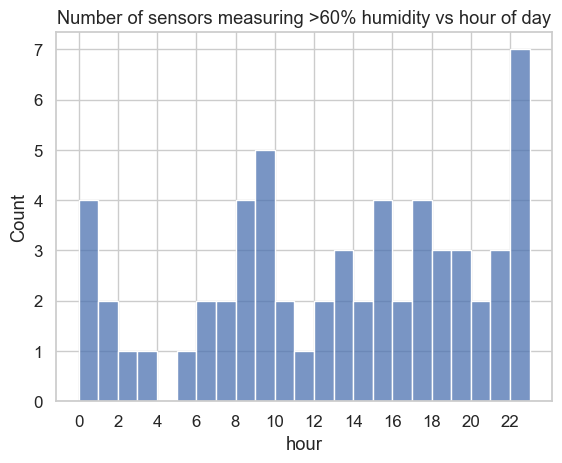

In [112]:
sns.histplot(data=df_tidy[df_tidy['humidity'] >= 60], x='hour', bins=range(0, 24))
plt.title('Number of sensors measuring >60% humidity vs hour of day')
plt.xticks(range(0, 24, 2))
plt.show()

In [115]:
corr = df_tidy['temp_celsius'].corr(df_tidy['humidity'])
print(corr)

0.04500789011515326


#### Report

**Context**

The facility manager wants to determine the humidity patterns in the greenhouses over time, as well as determine whether temperature has an influence on humidity.

**Tidying Steps**

1. Apply `pandas.melt()` to reshape the DataFrame from wide to long format.
2. Extract `temp_celsius` and `humidity` information using `Series.str.split()`.
3. Add `hour` column to indicate hours past midnight.


**Findings**

1. There appears to be a small spike in humidity in the morning and a large spike at night.
2. Temperature has very little correlation with humidity.

**Recommendations**

Recalibrate your sensors.

### Challenge 3: Developer tools preference survey

*Stakeholder*: **Product manager**  
> “We surveyed devs about their favorite tools. Can you tell if age group influences tool choice and satisfaction?”

**Key questions**
1. Which tools are most popular in the 18-24 vs 45+ brackets?
2. Does reported satisfaction differ by primary tool?

In [ ]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():
    
    np.random.seed(0)

    n = 200
    choices = ['Python', 'R', 'MATLAB', 'JavaScript']
    data = {
        'respondent_id': range(1,n+1),
        'age_group': np.random.choice(['18-24','25-34','35-44','45+'], n),
        'tools_used': [', '.join(np.random.choice(choices, size=np.random.randint(1,4), replace=False)) for _ in range(n)],
        'satisfaction_1-5': np.random.randint(1,6, n)
    }
    return pd.DataFrame(data)


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (200, 4)


,respondent_id,age_group,tools_used,satisfaction_1-5
0,1,35-44,"MATLAB, JavaScript",2
1,2,18-24,"JavaScript, MATLAB, Python",5
2,3,35-44,Python,2
3,4,18-24,MATLAB,1
4,5,45+,"R, Python",3


#### Your analysis below

In [58]:
# TODO: tidy the data, visualize, and answer questions


### Challenge 4: Blood pressure drug trial

*Stakeholder*: **Principal Investigator**  
> “We ran a cross-over trial with three conditions. Summarise efficacy in reducing BP and highlight best performer.”

**Key questions**
1. What is the average BP reduction (post-minus-pre) for each drug?
2. Is there significant individual variability?

In [59]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    subjects = [f"Subj_{i:03d}" for i in range(1,51)]
    conditions = ['placebo','drugA','drugB']
    df = pd.DataFrame({'subject': subjects})
    for c in conditions:
        df[f"bp_pre_{c}"] = np.random.normal(120,10, len(subjects))
        df[f"bp_post_{c}"] = df[f"bp_pre_{c}"] - np.random.normal(5,2, len(subjects)) + (0 if c=='placebo' else  -10 + 5*conditions.index(c))
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (50, 7)


,subject,bp_pre_placebo,bp_post_placebo,bp_pre_drugA,bp_post_drugA,bp_pre_drugB,bp_post_drugB
0,Subj_001,104.175055,100.802247,115.423594,102.102379,120.675169,115.464704
1,Subj_002,142.436019,138.479302,123.718111,116.551318,127.776041,122.959360
2,Subj_003,105.772051,100.918290,124.573096,120.177502,119.642573,114.580038
3,Subj_004,139.223248,136.818007,129.623417,122.000266,123.360157,118.544382
4,Subj_005,98.849440,94.499310,127.708370,118.916049,128.864915,121.154030


#### Your analysis below

In [60]:
# TODO: tidy the data, visualize, and answer questions


### Challenge 5: Social media campaign analytics

*Stakeholder*: **Marketing lead**  
> “Our views are recorded as strings like ‘1.2k’. Clean this up and evaluate platform performance.”

**Key questions**
1. Which platform achieved the highest median daily *views* and *like rate*?
2. Are weekends different from weekdays?

In [61]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    dates = pd.date_range('2024-07-01', '2024-12-31', freq='D')
    platforms = ['TikTok','Instagram','YouTube']
    rows = []
    for d in dates:
        for p in platforms:
            views = np.random.randint(1000, 100000)
            likes = int(views * np.random.uniform(0.05, 0.2))
            rows.append({'date': d, 'platform': p, 'views': f"{views/1000:.1f}k", 'likes': likes if np.random.rand()>0.05 else np.nan})
    df = pd.DataFrame(rows)
    dup = df.sample(200)
    df = pd.concat([df, dup], ignore_index=True).reset_index(drop=True)
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (752, 4)


,date,platform,views,likes
0,2024-07-01,TikTok,54.5k,5195.0
1,2024-07-01,Instagram,13.6k,1192.0
2,2024-07-01,YouTube,55.4k,9169.0
3,2024-07-02,TikTok,91.5k,11880.0
4,2024-07-02,Instagram,61.3k,4527.0


#### Your analysis below

In [62]:
# TODO: tidy the data, visualize, and answer questions
